# ML Models
K-nn, linear and logistic regression, decision trees

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import cx_Oracle

from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder

from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss

from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge
from sklearn.tree import DecisionTreeClassifier,export_text, DecisionTreeRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,BaggingClassifier

from sklearn import set_config,get_config
set_config(display='diagram')   

from mlxtend.plotting import plot_decision_regions

from IPython.display import display, HTML

np.random.seed(0)
max_movieid=500
max_userid=2000

# IRIS data

only columns 2,3

## Train Test Split
with the X-features and the goal y .

In [2]:
from sklearn.datasets import load_iris

data=load_iris()
X, y = (data.data[:,2:], data.target)
X_train0, X_test0, y_train, y_test = train_test_split(X, y, random_state=0)
print('Train {}, Test {}'.format(len(y_train),len(y_test)))

In [56]:
print('Train {}, Test {}'.format(len(y_train),len(y_test)))

Train 850248, Test 94472


## The features are not standardized/normalized

In [3]:
X_train0[:,0].mean()

3.7964285714285713

## Standardization

preprocessing

    each feature is transformed to have the mean 0 and the variance 1

other preprocessing is possible.

In [4]:
preproc=StandardScaler()
X_train=preproc.fit_transform(X_train0) # fit and transform
X_test=preproc.transform(X_test0)  # on TEST data you use the transform based on the TRAIN data.

Let us check the means of our datasets

In [5]:
print('X_train0[:,0].mean()= {:3.3f}'.format(X_train0[:,0].mean()))
print('X_train[:,0].mean() = {:3.3f}'.format(X_train[:,0].mean()))
print('X_test[:,0].mean()  ={:3.3f}'.format(X_test[:,0].mean()))

X_train0[:,0].mean()= 3.796
X_train[:,0].mean() = 0.000
X_test[:,0].mean()  =-0.085


# K-nn classifier

model fitting

    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
predict

    clf.predict(X_test, y_test)
is hidden in the plot 

    plot_decision_regions(X_test, y_test, clf=clf, legend=2)


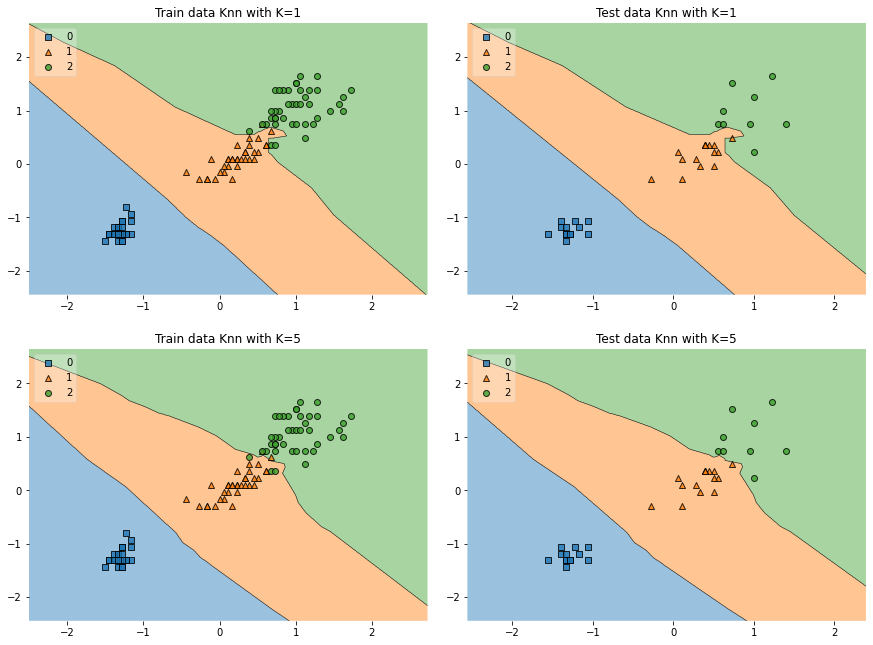

In [6]:
fig, ax_lst = plt.subplots(2, 2,figsize=(15,11)) 
fig.subplots_adjust(hspace=0.2, wspace=0.1)
for (i,k) in [(1,1),(3,5)]:
    sub1=plt.subplot(2,2,i)
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)                        ################### fit
    plot_decision_regions(X_train, y_train, clf=clf, legend=2) ######### train data plot
    plt.title('Train data Knn with K={}'.format(k))
    sub1=plt.subplot(2,2,i+1)
    plot_decision_regions(X_test, y_test, clf=clf, legend=2)  ########## test data plot, clf for background as before
    plt.title('Test data Knn with K={}'.format(k))
plt.show()

## Accuracy measure

accuracy estimate (=1-error)

    1) on test data

    2) by crossvalidation: an average of 10 estimates.

Test accurancy: 1.0
CV accurancy: 0.955, (0.895,1.016)


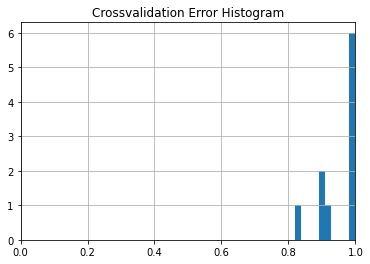

In [7]:
print('Test accurancy: {}'.format(clf.score(X_test,y_test)))
cv_score=cross_val_score(clf,X_train , y_train, cv=10)
plt.hist(cv_score)
plt.title('Crossvalidation Error Histogram')
plt.xlim(0,1)
plt.grid()
cv=np.mean(cv_score)
std=np.std(cv_score)
print('CV accurancy: {:3.3f}, ({:3.3f},{:3.3f})'.format(cv,cv-2*std,cv+2*std))


## Grid search

the number of neighbours can be searched by the crosvalidation


In [8]:
param_grid = { 
    'n_neighbors': range(1,15),
             }
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(clf, param_grid, n_jobs= 5)
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

{'n_neighbors': 4}
0.9648221343873518


In [9]:
list(CV.cv_results_['param_n_neighbors'])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

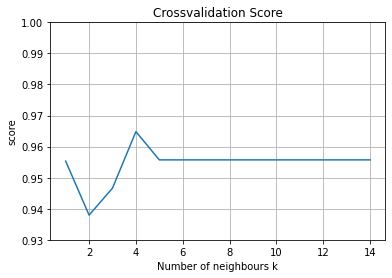

In [10]:
plt.plot(list(CV.cv_results_['param_n_neighbors']),CV.cv_results_['mean_test_score'])
plt.title('Crossvalidation Score')
plt.xlabel('Number of neighbours k')
plt.ylabel('score')
plt.ylim(0.93,1)
plt.grid()

### Bagging

the simplest way to specify another model

not very usefull in this scenario.

In [11]:
bagging = BaggingClassifier(KNeighborsClassifier(),
                             max_samples=0.5, max_features=0.5)
bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5)

Text(0.5, 1.0, 'Baging model')

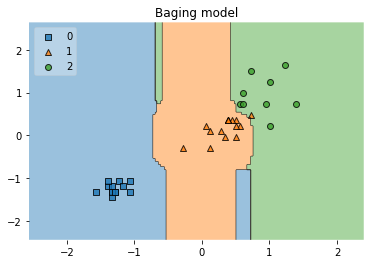

In [12]:
plot_decision_regions(X_test, y_test, clf=bagging, legend=2)
plt.title('Baging model')

## Confusion Matrix

the basis for many error measures

In [13]:
def confusion_matrix(y_model,y_test):
    disp=pd.DataFrame({'pred':y_model,'real':y_test}).groupby(['pred','real'])['pred'].count().unstack()
    disp.fillna(0,inplace=True)
    display(HTML('<H3>Confusion matrix</h3> '+disp._repr_html_()))
    return disp

In [14]:
y_predict=bagging.predict(X_test)
conf=confusion_matrix(y_predict,y_test)

real,0,1,2
pred,,,
0,13.0,0.0,0.0
1,0.0,15.0,0.0
2,0.0,1.0,9.0


## Accurancy Score from Scratch


   sum(diag) / sum of everything
   
   note: sum(diag) is the trace of the matrix.

In [15]:
sum(np.diag(np.matrix(conf)))/sum(sum(np.array(conf)))

0.9736842105263158

In [16]:
print(bagging.score(X_test,y_test))

0.9736842105263158


# Regression

the goal variable is continuous

sklearn.neighbors.KNeighborsRegressor

# Task:

download the movie topic assigment data from data/topics.json

Join by TT with the MMOVIES and RATINGS, predict one of the following:

a) genre
b) rating.

Compare the accuracy (error) with the basic model, that predicts the overall average / the most frequent class.


# Movie database

In [57]:
#cx_Oracle.init_oracle_client(lib_dir=r"C:\Users\student\Oracle\seminardm")
import warnings
warnings.simplefilter("ignore")

connection =cx_Oracle.connect(user='websem', password='websem108', 
                              dsn='tirpitz.ms.mff.cuni.cz:1511/jedenact.ms.mff.cuni.cz')
movies=pd.read_sql_query('select MOVIEID,TITLE,GENRE,TT,CNT,BAYESAVG from MMOVIES WHERE MOVIEID>3 AND MOVIEID<{}'.format(max_movieid),
                         connection)
connection =cx_Oracle.connect(user='websem', password='websem108', 
                              dsn='tirpitz.ms.mff.cuni.cz:1511/jedenact.ms.mff.cuni.cz')
ratings=pd.read_sql_query('''select MOVIEID,USERID,RATING from MRATINGS 
                            WHERE MOVIEID<{} AND USERID<{}
                            ORDER BY MOVIEID, USERID
'''.format(max_movieid,max_userid)
                          ,connection)#,index_col=['MOVIEID','USERID'])
imdb=pd.read_sql_query('select TT,RATING as IMDBRATING,METASCORE from IMDB',connection)
movies=pd.merge(movies,imdb, how='left',on='TT')
movies.set_index('MOVIEID',inplace=True)


# Ratings

    rats
    
It is much easier to predict the rating for movies already rated by the user.

In [18]:
rats=pd.merge(ratings[ratings['RATING']>0],movies, how='inner', on='MOVIEID') # or > 3.5 for positive ratings
print('rats.shape= {}'.format(rats.shape))

rats.shape= (48127, 10)


# Has the user RATED the movie?

    cross_rated DataFrame

It is much more dificult to predict, which movies is the user GOING TO RATE.

In [19]:
rated=rats.groupby(['MOVIEID','USERID'])['RATING'].count()

## We create a multiindex to tranform the  groupby result into a DataFrame

In [20]:
cross_index=pd.MultiIndex.from_product([rated.index.unique(0), rated.index.unique(1)],
                           names=rated.index.names)
cross_rated=pd.DataFrame(rated,index=cross_index)
cross_rated.columns=['RATED']
cross_rated.fillna(0,inplace=True)

In [21]:
pd.pivot_table(cross_rated,index='USERID',columns='MOVIEID',values=['RATED'],aggfunc='sum',fill_value=0)

RATED                                      ...                      \
MOVIEID   4   5   6   7   8   9   10  11  12  13   ... 490 491 492 493 494   
USERID                                             ...                       
1           0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
2           0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
3           0   0   0   0   0   0   0   0   0   0  ...   1   0   0   0   0   
4           0   0   1   0   0   0   1   0   0   0  ...   0   0   0   0   0   
5           0   0   0   0   0   0   0   1   0   0  ...   0   1   0   0   0   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..   
1993        0   0   1   0   0   0   0   0   0   0  ...   0   0   0   0   1   
1995        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
1996        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
1997        0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
1998        0   0   0   0   0   0   1   0   0   0  ...   0   0   0   0   0   

                             
MOVIEID 495 496 497 498 499  
USERID                       
1         0   0   0   0   0  
2         0   0   0   0   0  
3         0   0   0   0   0  
4         0   0   0   0   0  
5         0   0   0   0   0  
...      ..  ..  ..  ..  ..  
1993      0   0   0   0   0  
1995      0   0   0   0   0  
1996      0   0   0   0   0  
1997      0   0   0   0   0  
1998      0   0   0   0   0  

[1960 rows x 482 columns]

## Users rated only a small portion of movies

In [22]:
hits=rats.shape[0]/cross_rated.shape[0]
print('Ratio of RATED movies {}%.'.format(round(hits*100,2)))

Ratio of RATED movies 5.09%.


In [23]:
# counts of ratings by user
cross_rated.groupby('USERID')['RATED'].sum()

USERID
1       14.0
2        8.0
3       18.0
4       19.0
5       29.0
        ... 
1993     9.0
1995    18.0
1996     1.0
1997    13.0
1998    21.0
Name: RATED, Length: 1960, dtype: float64

## We join the table MOVIES to get features

In [24]:
cross_rated=pd.merge(cross_rated, movies, how='left', left_index=True,right_index=True)
cross_rated.head(2)

RATED                     TITLE                   GENRE  \
MOVIEID USERID                                                            
4       41        1.0  Waiting to Exhale (1995)  Comedy|Drama|Romance\r   
        61        1.0  Waiting to Exhale (1995)  Comedy|Drama|Romance\r   

                       TT   CNT  BAYESAVG  IMDBRATING  METASCORE  
MOVIEID USERID                                                    
4       41      tt0114885  2430         3         5.6        NaN  
        61      tt0114885  2430         3         5.6        NaN

# Task
find features usefull to predict the 'RATED' attribute.

In [25]:
rats.columns

Index(['MOVIEID', 'USERID', 'RATING', 'TITLE', 'GENRE', 'TT', 'CNT',
       'BAYESAVG', 'IMDBRATING', 'METASCORE'],
      dtype='object')

In [26]:
cross_rated.columns

Index(['RATED', 'TITLE', 'GENRE', 'TT', 'CNT', 'BAYESAVG', 'IMDBRATING',
       'METASCORE'],
      dtype='object')

# Preprocessing

## Missing data

SimpleImputer

    median, mean, constant

other methods 

    additional matrix of 'missingness'
    EM and other imputer methods.

## Rescaling the variables

StandardScaler

    mean 0, variance 1
MinMaxScaler

    min 0, max 1
    this is the recommended choise for not-normal (not-gaussian) features
Categorical data

    OneHotEncoder - a new variable True/False for each value
    
        drop first in the linear regression, you have dependent columns otherwise
        for other models you may keep all features.

## Pipeline

the way to join more steps in one object

in my code I select also only some features, that in ff_set

In [27]:
def get_preprocessor(ff_set):
    f_set=set(ff_set)
    delete_features=['TITLE', 'GENRE', 'TT']
    
    standard_features = list(set(['BAYESAVG', 'IMDBRATING',
       'METASCORE'])&f_set)
    standard_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    
    normal_features = list(set(['CNT'])&f_set)
    normal_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler())])
    
    categorical_features = list(set([])&f_set)
    categorical_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(drop='first'))])#,handle_unknown='ignore'

    preprocessor = ColumnTransformer(
        transformers=[
            ('stand', standard_transformer, standard_features),
            ('norm',normal_transformer,normal_features),
            ('cat', categorical_transformer, categorical_features)
                     ]
#    ,        remainder='passthrough'
            )
    return(preprocessor)




## Select Features by the type
.select_dtypes

In [28]:
#categorical = list(X_train.select_dtypes('category').columns)
#numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
#categorical_features = X_train.select_dtypes(include=['object']).drop([], axis=1).columns


# Regression
Learning rats['RATING']



## Train, test split and transform

In [29]:
X_train0, X_test0, y_train, y_test = train_test_split(rats,
                                                    rats['RATING'], test_size=0.1, random_state=0)

preprocessor=get_preprocessor(rats.columns)
X_train=preprocessor.fit_transform(X_train0)
X_test=preprocessor.transform(X_test0)

In [30]:
display(HTML(preprocessor._repr_html_()))

## Linear regression

In [31]:
clf = LinearRegression().fit(X_train, y_train)
y_model=clf.predict(X_test)
display(HTML(clf._repr_html_()))

## One sample step by step

In [32]:
display(HTML('Original values'))
display(HTML('<B>Sample</b>'))

print(X_test0[np.concatenate(preprocessor._columns)].iloc[0])

BAYESAVG          3.0
IMDBRATING        7.2
METASCORE        78.0
CNT           37895.0
Name: 38944, dtype: float64


## Transform the value and predict

In [33]:
display(HTML('<B>Transform and predict</B>'))
X0=preprocessor.transform((X_test0.iloc[:1]))
y0=clf.predict(X0)
print(preprocessor._columns)
print('X:{}, y:{}, pred:{:.2f}'.format(X0[0],y_test.values[0],y0[0]))

[['BAYESAVG', 'IMDBRATING', 'METASCORE'], ['CNT'], []]
X:[-0.80338738  0.14102408  0.77976055  0.60387374], y:3.0, pred:3.45


## Model Parameters

In [34]:
display(HTML('<H3>{}</h3> '.format(type(clf))))
display(HTML('intercept: {}'.format(clf.intercept_)))
display(pd.Series(clf.coef_,index=np.concatenate(preprocessor._columns)))

BAYESAVG      0.124972
IMDBRATING    0.321622
METASCORE     0.048417
CNT          -0.014704
dtype: float64

## Score $R^2$ on test data

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [35]:
display(HTML('<H3>Score {:.2f}</h3> '.format(clf.score(X_test, y_test))))

## Regression Tree

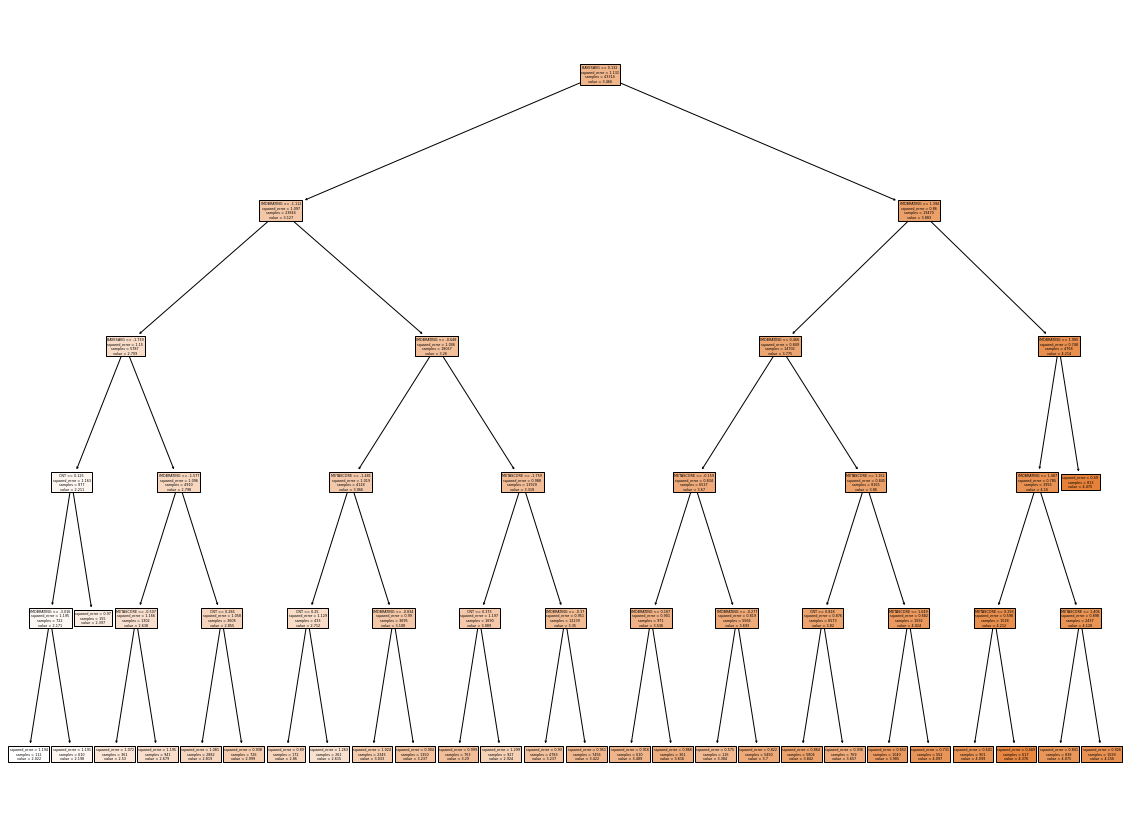

In [36]:
tree_clf=DecisionTreeRegressor(max_depth=5)
tree_clf.fit(X_train, y_train)   

fig, ax_lst = plt.subplots(1, 1,figsize=(20,15))
sklearn.tree.plot_tree(tree_clf, 
                   feature_names=np.concatenate(preprocessor._columns),
                   filled=True)
plt.show()

## Text output

In [37]:
__mm=list(np.concatenate(preprocessor._columns))
print(export_text(tree_clf,feature_names=__mm))

|--- BAYESAVG <= 0.13
|   |--- IMDBRATING <= -1.11
|   |   |--- BAYESAVG <= -1.74
|   |   |   |--- CNT <= 0.12
|   |   |   |   |--- IMDBRATING <= -3.02
|   |   |   |   |   |--- value: [2.02]
|   |   |   |   |--- IMDBRATING >  -3.02
|   |   |   |   |   |--- value: [2.20]
|   |   |   |--- CNT >  0.12
|   |   |   |   |--- value: [2.40]
|   |   |--- BAYESAVG >  -1.74
|   |   |   |--- IMDBRATING <= -1.58
|   |   |   |   |--- METASCORE <= -0.51
|   |   |   |   |   |--- value: [2.53]
|   |   |   |   |--- METASCORE >  -0.51
|   |   |   |   |   |--- value: [2.68]
|   |   |   |--- IMDBRATING >  -1.58
|   |   |   |   |--- CNT <= 0.29
|   |   |   |   |   |--- value: [2.82]
|   |   |   |   |--- CNT >  0.29
|   |   |   |   |   |--- value: [3.00]
|   |--- IMDBRATING >  -1.11
|   |   |--- IMDBRATING <= -0.65
|   |   |   |--- METASCORE <= -1.48
|   |   |   |   |--- CNT <= 0.25
|   |   |   |   |   |--- value: [2.86]
|   |   |   |   |--- CNT >  0.25
|   |   |   |   |   |--- value: [2.61]
|   |   |   |---

## Cost complexity prunning

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

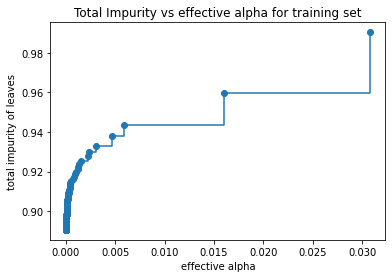

In [38]:
tree_clf=DecisionTreeRegressor()
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")


### select the last 8 trees

In [39]:
n_trees=8
ccp_alphas[(-n_trees):]

array([0.00230651, 0.00232166, 0.00303734, 0.00466386, 0.0059156 ,
       0.01597173, 0.03078454, 0.14148875])

## Calculate $\alpha$ for the trees

In [40]:
clfs = []
for ccp_alpha in ccp_alphas[(-n_trees):]:
    clf = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.14148874936713052


## Train and Test error for the selected trees

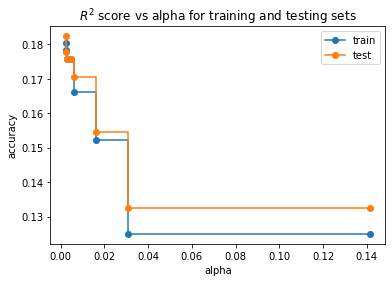

In [41]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("$R^2$ score vs alpha for training and testing sets")
ax.plot(ccp_alphas[(-n_trees):], train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas[(-n_trees):], test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

## One tree example

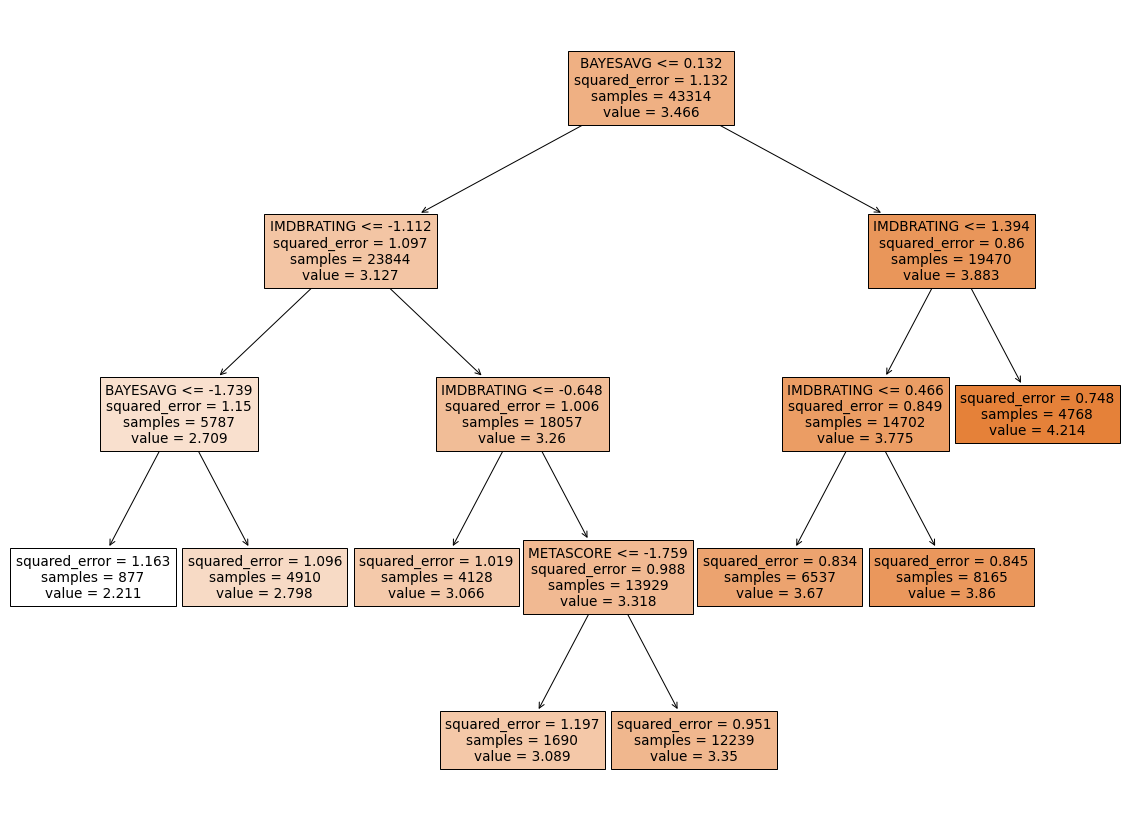

In [42]:
fig, ax_lst = plt.subplots(1, 1,figsize=(20,15))  
sklearn.tree.plot_tree(clfs[-n_trees], 
                   feature_names=np.concatenate(preprocessor._columns),
                   filled=True)
plt.show()

# Classification
Learning cross_rated['RATED']


## Train, test split and transform

In [43]:
X_train0, X_test0, y_train, y_test = train_test_split(cross_rated,
                                                    cross_rated['RATED'], test_size=0.1, random_state=0)

preprocessor=get_preprocessor(cross_rated.columns)
X_train=preprocessor.fit_transform(X_train0)
X_test=preprocessor.transform(X_test0)

# Logistic regression

In [44]:
clf = LogisticRegression(random_state=0,class_weight='balanced', 
                         penalty='l2').fit(X_train, y_train)
dy_model=clf.predict(X_test)
display(HTML(clf._repr_html_()))
display(HTML('<H3>Mean Accuracy (Score) {}</h3> '.format(np.round(clf.score(X_test, y_test),2))))
display(HTML('<H3>Model</h3>'))
display(HTML('intercept: {}'.format(clf.intercept_[0])))
display(pd.Series(clf.coef_[0],index=np.concatenate(preprocessor._columns)))
#disp=pd.DataFrame({'pred':y_model,'real':y_test}).groupby(['pred','real'])['pred'].count().unstack()
#display(HTML('<H3>Confusion matrix</h3> '+disp._repr_html_()))


BAYESAVG      0.047973
IMDBRATING    0.013842
METASCORE    -0.090641
CNT           7.124727
dtype: float64

# Decision Tree

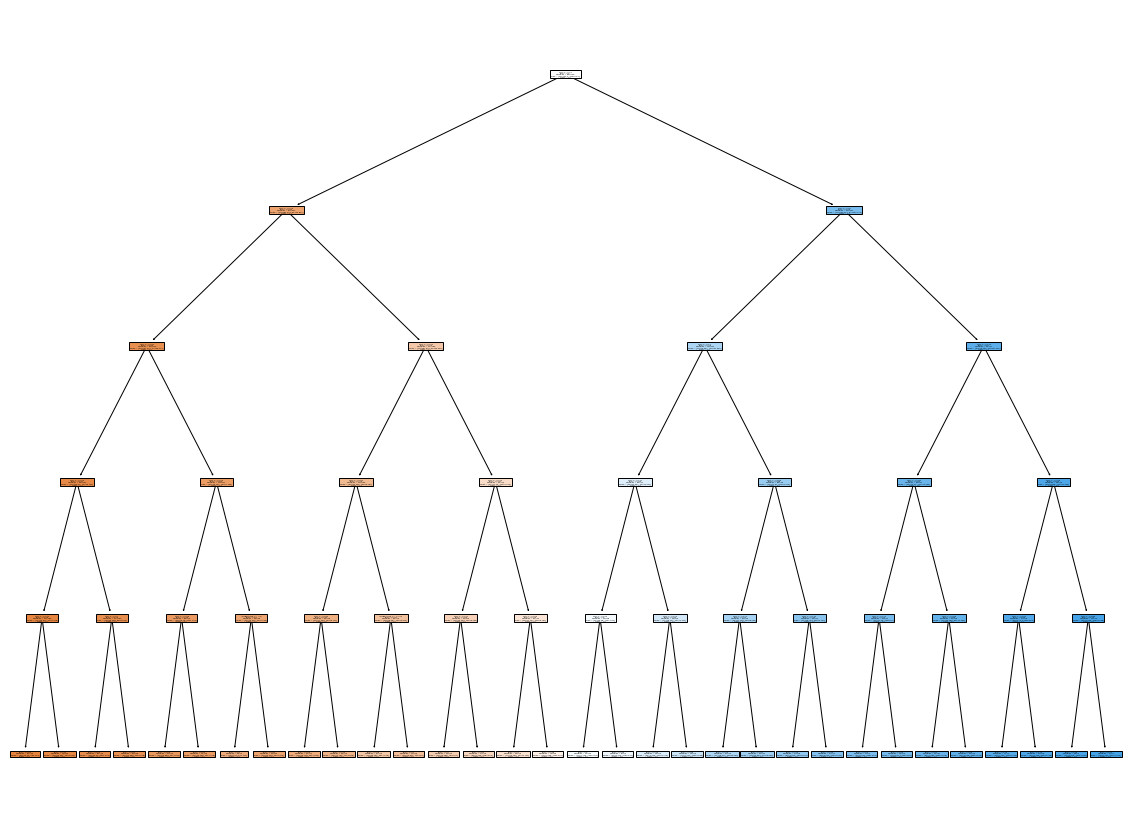

In [45]:
tree_clf=DecisionTreeClassifier(class_weight='balanced',max_depth=5)

tree_clf.fit(X_train, y_train)   

fig, ax_lst = plt.subplots(1, 1,figsize=(20,15))
sklearn.tree.plot_tree(tree_clf, 
                   feature_names=np.concatenate(preprocessor._columns),
                   class_names=[str(tree_clf.classes_[i]) for i in range(2)],
                   filled=True)
plt.show()

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

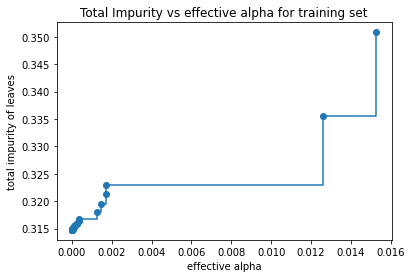

In [46]:
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [47]:
ccp_alphas[(-4):]

array([0.00172372, 0.01259936, 0.01527582, 0.14916979])

In [48]:
clfs = []
for ccp_alpha in ccp_alphas[(-4):]:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha,class_weight='balanced')
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.1491697949518095


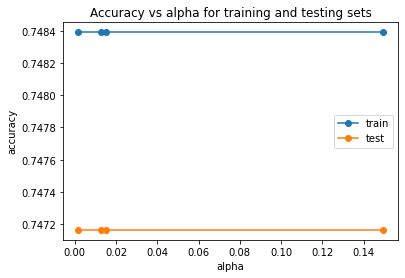

In [49]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[(-4):], train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas[(-4):], test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

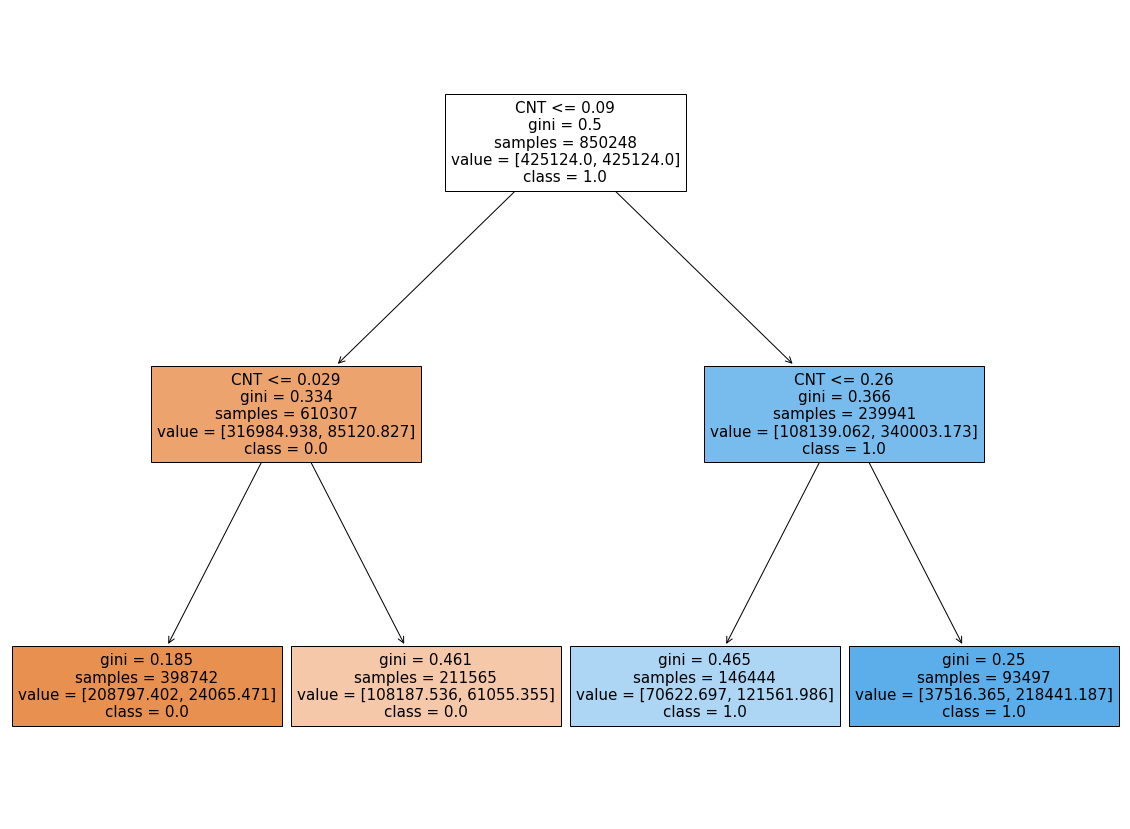

In [50]:
fig, ax_lst = plt.subplots(1, 1,figsize=(20,15))  
sklearn.tree.plot_tree(clfs[-4], 
                   feature_names=np.concatenate(preprocessor._columns),
                   class_names=[str(tree_clf.classes_[i]) for i in range(2)],
                   filled=True)
plt.show()

In [51]:
clf=clfs[-4]
display(HTML(clf._repr_html_()))
display(HTML('<H3>Score {}</h3> '.format(np.round(clf.score(X_test, y_test),2))))
#confusion_matrix(y_model, y_test)


## Feature Importance

    clf.feature_importances_

selecting the most important features.

In [52]:
fi=pd.DataFrame({'importance':clf.feature_importances_},index=np.concatenate(preprocessor._columns))
display(HTML('<H3>Feature Importance</h3> '+fi._repr_html_()))

,importance
BAYESAVG,0.0
IMDBRATING,0.0
METASCORE,0.0
CNT,1.0


### Your task is to find better features.


# Ansamble learning

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=4,max_leaf_nodes=15,class_weight='balanced')
clf = clf.fit(X_train, y_train)
y_model=clf.predict(X_test)

In [54]:
display(HTML(clf._repr_html_()))
display(HTML('<H3>Score {}</h3> '.format(np.round(clf.score(X_test, y_test),2))))
confusion_matrix(y_model, y_test)
fi=pd.DataFrame({'importance':clf.feature_importances_},index=np.concatenate(preprocessor._columns))
display(HTML('<H3>Feature Importance</h3> '+fi._repr_html_()))

real,0.0,1.0
pred,,
0.0,66652,992
1.0,23079,3749


,importance
BAYESAVG,0.000266
IMDBRATING,0.003022
METASCORE,0.150746
CNT,0.845966


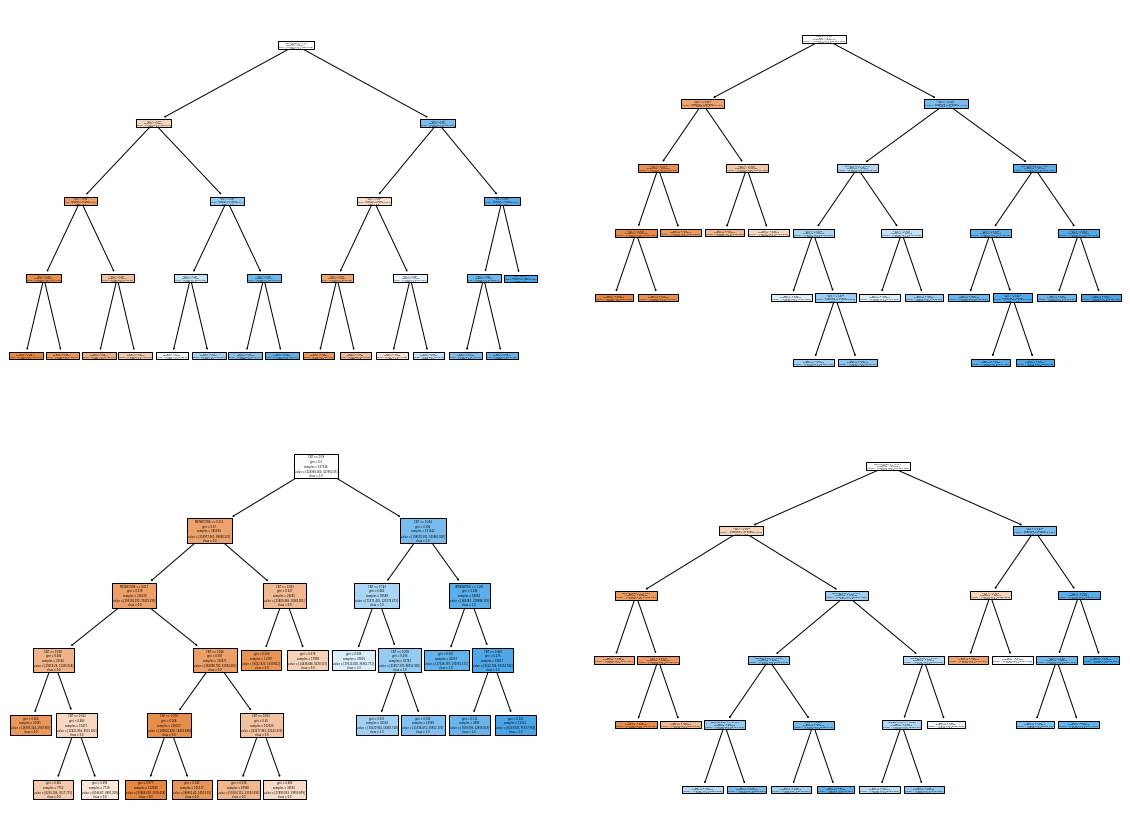

In [55]:
fig, ax_lst = plt.subplots(2, 2,figsize=(20,15))  
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(4):
    sub1=plt.subplot(2,2,i+1)
    mm=sklearn.tree.plot_tree(clf.estimators_[i], 
                   feature_names=np.concatenate(preprocessor._columns),
                   class_names=[str(clf.classes_[i]) for i in range(2)],
                   filled=True)
plt.show()